**Importing necessary libraries**

In [ ]:
# Importing data manipulation and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraies
from sklearn.preprocessing import StandardScaler,LabelEncoder # for normalizing and labelling
from sklearn.cluster import sk # for clustering
from sklearn.decomposition import PCA # for dimensionality reduction

# Importing evaluation libraries for k-means
from sklearn.metrics import silhouette_score

#Importing measuring tools
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import v_measure_score

import warnings

warnings.filterwarnings('ignore')
sns.set() # setting seaborn as default

**Loading data and labels**

In [ ]:
data1 = pd.read_csv("data.csv")
labels1 = pd.read_csv("labels.csv")
data1    #visualizing the data dataset


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
data1.shape  # the dataset has 801 row and 20532 columns

(801, 20532)

In [ ]:
data1.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


**Removing the unnecessary sample name columns for data and labels datasets**

In [ ]:
#removing first sample name column
data = data1.iloc[:, 1:]

In [ ]:
# There is no sample column now
pd.DataFrame(data).head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
# Visualizing the lables dataset
labels1

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [ ]:
labels1['Class'].unique() # There are 5 different classes in the labels dataset

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [ ]:
labels1.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_0,BRCA
freq,1,300


In [ ]:
labels = labels1.drop(labels1.columns[0], axis=1) # Remove the sample name column

In [ ]:
labels.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [ ]:
# Encoding the string labels to integers
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(labels.values.ravel())
true_labels

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

**Normalize the data to remove scale problem**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)  # Normalizing the data using sklearn's StandardScalar method

In [ ]:
pd.DataFrame(scaled_data).head() #display scaled dataset

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
0,-0.194799,-0.828030,0.159800,-1.948277,1.221575,0.0,-0.207968,0.180910,-0.125376,-0.065633,...,-1.300200,-0.921755,-0.877838,0.996247,-1.166072,0.389441,-0.869566,-1.187938,-0.116483,-0.261901
1,-0.194799,-2.015017,-1.415042,1.353109,-0.376518,0.0,-0.532222,-0.983088,-0.125376,-0.065633,...,-1.747076,-2.392213,-0.831893,0.591649,-2.549598,1.391628,0.623551,-0.342277,-1.656889,-0.261901
2,-0.194799,0.417348,1.156735,0.249807,0.112832,0.0,-0.391297,-0.092995,-0.125376,-0.065633,...,-1.034088,-1.059669,2.248803,0.232601,0.317880,-4.025621,-0.632381,0.886860,-1.855264,-0.261901
3,-0.194799,0.543888,1.326182,-0.099053,0.755741,0.0,0.395348,-0.127831,-0.125376,-0.065633,...,0.241299,0.044905,0.224956,1.719725,-0.263847,-0.521747,-0.793609,0.166174,-1.078941,-0.261901
4,-0.194799,-0.295955,-0.257107,-0.286413,-0.148843,0.0,-0.757118,-0.273165,-0.125376,-0.065633,...,0.133335,0.208252,0.837739,0.979924,0.196645,0.268992,-1.615841,-0.229878,-0.201588,-0.261901


**finding the optimal K value using silhouette scores:**
Before actually running the K-means clustering algorithm, first I have to find the optimal K value.To do that, silhuette score evaluation metric is plotted to get the optimal k value.

<b>Silhouette scores: </b> It measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score suggests the object is well matched to its own cluster and distinct from other clusters. <br>

Optimal number of clusters: 6
Silhouette score for k= 6 : 0.13931463383793538


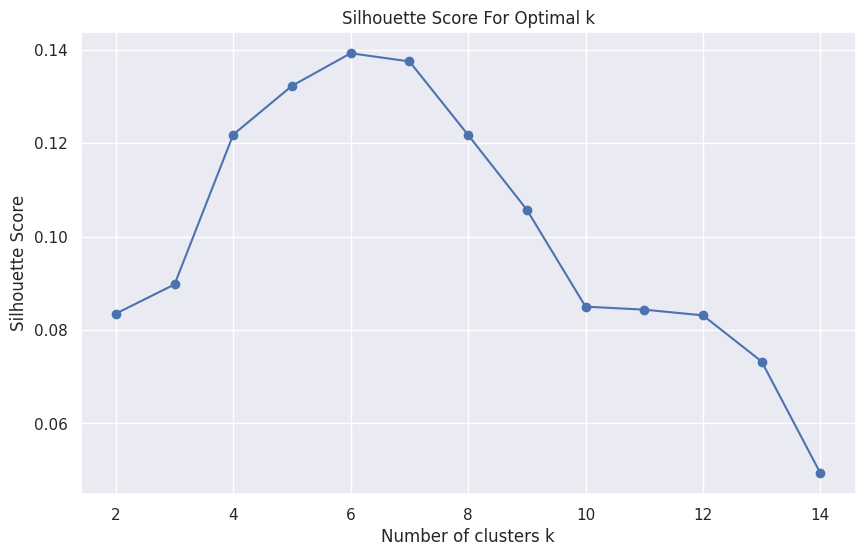

In [ ]:
silhouette_scores = []
for k in range(2, 15):  # Silhouette score is only useful when k is 2 or more
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto',init ='k-means++')
    clusters = kmeans.fit_predict(scaled_data)
    score1 = silhouette_score(scaled_data, clusters)                #Silhouette_scores
    silhouette_scores.append(score1)

# Find the k with the highest silhouette score
optimal_k = range(2,15)[silhouette_scores.index(max(silhouette_scores))]
optimal_score = max(silhouette_scores)
print ("Optimal number of clusters:", optimal_k)
print("Silhouette score for k=", optimal_k, ":", optimal_score)

# Plot Silhouette scores for each k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.show()


Since optimal number of clusters found using silhouette score is 6. I am using k as 6 in k-means clustering


In [ ]:
#apply k-means clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto',init ='k-means++')
clusters = kmeans.fit_predict(scaled_data)

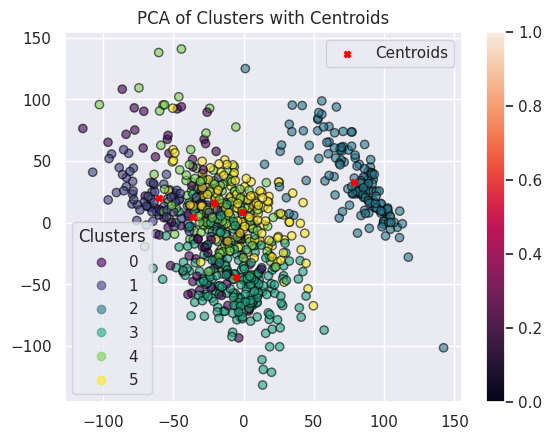

In [ ]:
# Apply PCA for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)

# Transform centroids to the PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

fig, ax = plt.subplots()

# Plot the clusters
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1],c=clusters, cmap='viridis', marker='o', edgecolor='black', alpha=0.6)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
ax.add_artist(legend1)

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=20, label='Centroids')

plt.title('PCA of Clusters with Centroids')
plt.legend()
plt.colorbar()
plt.show()


In [ ]:
# Accuracy
ari_score = adjusted_rand_score(labels.values.ravel(), clusters)
print("Adjusted Rand Index:", ari_score)

print("V_Measure score is:",v_measure_score(true_labels, clusters))

Adjusted Rand Index: 0.8242280466213079
V_Measure score is: 0.890433374211846


In [ ]:
# Creating a function to analyze the cluster results which takes in given labels and generated labels
def Clusters_analyze(labels, real_labels):
    clusters, counts = np.unique(labels, return_counts = True) # identifies unique labels
    real_lab_perc = pd.DataFrame()

    # Percentage Calculation of Real Labels in Each Cluster
    for g in np.unique(labels):
        idx = np.where(labels == g)[0]
        cluster_real_labels = np.asarray(real_labels)[idx]
        cluster_labels = np.asarray(labels)[idx]
        real_label_in, real_lab_counts = np.unique(np.asarray(real_labels)[idx], return_counts = True)
        percent = 100*real_lab_counts/sum(real_lab_counts)
        xx = pd.DataFrame([percent], index = [g], columns =
        np.unique(real_label_in))
        real_lab_perc = pd.concat([real_lab_perc, xx], axis = 1)

    real_lab_perc=real_lab_perc.groupby(by=real_lab_perc.columns,axis=1).sum() # Group duplicate column together and add their value
    # transfor unique clusters into dataframe
    clusters_table = np.asarray([clusters, counts]).T
    clusters_table = pd.DataFrame(clusters_table, columns = ['cluster','number of items'])
    clusters_table.reset_index(drop=True, inplace=True)
    real_lab_perc.reset_index(drop=True, inplace=True)

    df = pd.concat( [clusters_table, real_lab_perc], axis=1)
    return df.round(1) # returning dataframe with rounded values

In [ ]:
Clusters_analyze(kmeans.labels_, labels)

,cluster,number of items,BRCA,COAD,KIRC,LUAD,PRAD
0,0,72,94.4,0.0,0.0,5.6,0.0
1,1,74,0.0,100.0,0.0,0.0,0.0
2,2,145,0.0,0.0,100.0,0.0,0.0
3,3,230,99.6,0.0,0.0,0.0,0.4
4,4,135,0.0,0.0,0.0,0.0,100.0
5,5,145,2.1,2.8,0.7,94.5,0.0


**Conclusion**
Clusters 1,2 and 4 are pure clusters because they are perfectly segregated to contain only one type of label each. Cluster 0 is almost a pure cluster, with a very high percentage of BRCA but there is a very small presence of other labels, which could be considered as noise or outliers. Cluster 3 has most percentage of BRCA and little percent of PRAD.Cluster 5 is the only cluster that is not predominantly one label. It is primarily made up of LUAD being the majority.Since I took 6 clusters for 5 labels.First BRCA label is divided majorly amoung 2 clusters 0 and 3.


**Now let us do K-means clustering manually without using KMeans**
By doing manually, I will have more power and flexibility to modify the k-means algorithm.

In [ ]:
#scaling to my desired minimum and maximum values using min-max scaling
feature = list(data.columns)
features = feature[1:]

#remove any missing vales
data = data.dropna(subset = features)

#scaling using min-max scaling 
def scale_data(data, min_val=1, max_val=5):
    # Copy the DataFrame to avoid modifying the original data
    data_scaled = data.copy()
    for column in data.columns:
        # Skip scaling for constant columns, set to min_val
        if data[column].min() == data[column].max():
            data_scaled[column] = min_val
        else:
            # Perform min-max scaling
            data_scaled[column] = (((data[column] - data[column].min()) /
                                   (data[column].max() - data[column].min())) *
                                   (max_val - min_val)) + min_val
    return data_scaled

# Replace 'data' with your actual DataFrame
data_scaled = scale_data(data)

data_scaled.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,1.071891,2.930988,3.041961,2.338234,2.887385,1.0,3.047759,1.719511,1.037509,1.013205,...,3.475269,2.886147,3.094236,3.105992,2.842260,3.309989,3.532985,2.395246,2.859882,1.072637
std,0.369282,0.770127,0.702963,0.499053,0.693977,0.0,0.653110,0.732346,0.299363,0.201320,...,0.607132,0.544990,0.572757,1.035125,0.556624,0.574180,0.560190,0.455748,0.781714,0.277518
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.474444,2.576892,2.010938,2.409041,1.0,2.617867,1.000000,1.000000,1.000000,...,3.116026,2.540946,2.746567,2.360087,2.486495,2.944797,3.225428,2.115171,2.318679,1.000000
50%,1.000000,3.016142,3.062844,2.286352,2.857227,1.0,3.074046,1.637747,1.000000,1.000000,...,3.537096,2.902640,3.109538,3.365436,2.886607,3.316476,3.567660,2.375673,2.743198,1.000000
75%,1.000000,3.490597,3.508482,2.585208,3.337734,1.0,3.469995,2.136166,1.000000,1.000000,...,3.893949,3.230615,3.460853,3.883482,3.197026,3.683106,3.941418,2.659684,3.368070,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#find centroids randomly
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
#example to see how random centroids are alloted
centroids = random_centroids(data_scaled, 6)
centroids

,0,1,2,3,4,5
gene_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
gene_1,3.430000,2.968716,3.119078,2.994235,3.071421,3.460121
gene_2,3.179355,3.947375,2.142555,2.733521,2.810514,3.181165
gene_3,2.327981,2.883777,2.700118,1.594761,2.140215,1.545390
gene_4,2.233374,2.232734,3.541345,2.919579,2.346167,3.738859
...,...,...,...,...,...,...
gene_20526,3.151334,3.068148,3.151695,4.139141,2.734304,2.911408
gene_20527,2.949818,3.763926,3.512563,3.785912,2.994057,3.658549
gene_20528,2.940668,2.289704,2.635991,1.350868,2.028729,2.580431
gene_20529,2.075668,2.062409,3.240491,2.393447,3.980780,2.175763


In [ ]:
#assign to a cluster based on euclidean distance
def cluster_assignment(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
#example to find how clusters assigned
clusters_assigned = cluster_assignment(data_scaled, centroids)
clusters_assigned.value_counts()        #number of samples assigned to clusters

0    270
3    238
1    202
5     55
2     32
4      4
Name: count, dtype: int64

In [ ]:
#create new centroids using geometric mean
def new_centroids(data, clusters_assigned, k):
    centroids = data.groupby(clusters_assigned).apply(lambda x: np.exp(np.log(x).mean())).T    #calculating geometric mean
    return centroids

In [ ]:
#plot how clusters are changing in each iteration
def plot_clusters(data, clusters_assigned, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)

    fig, ax = plt.subplots()
    ax.set_title(f'Iteration {iteration}')
    scatter = ax.scatter(x=data_2d[:,0], y=data_2d[:,1], c=clusters_assigned, edgecolor='black', alpha=0.6)
    legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
    ax.add_artist(legend1)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1],c='red', marker='X', s=50 ,label='Centroids')
    plt.show()

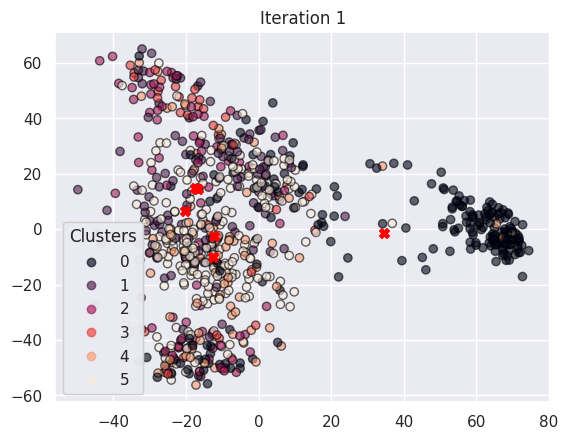

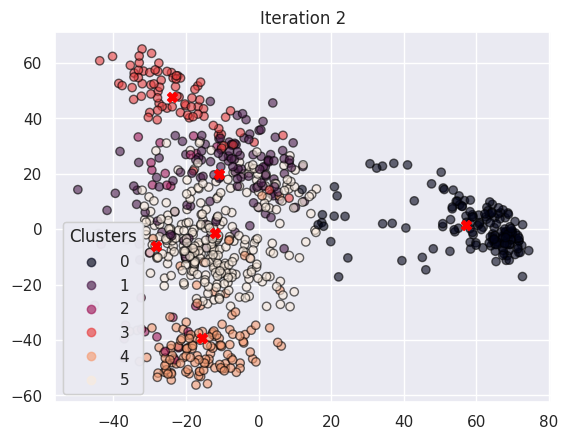

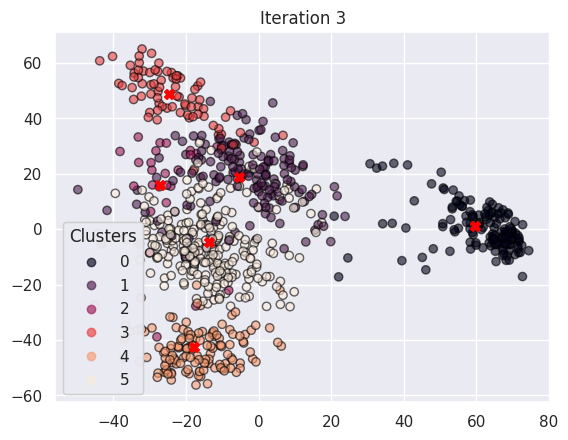

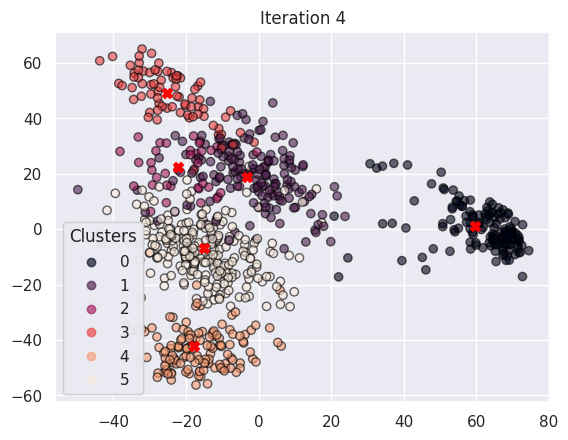

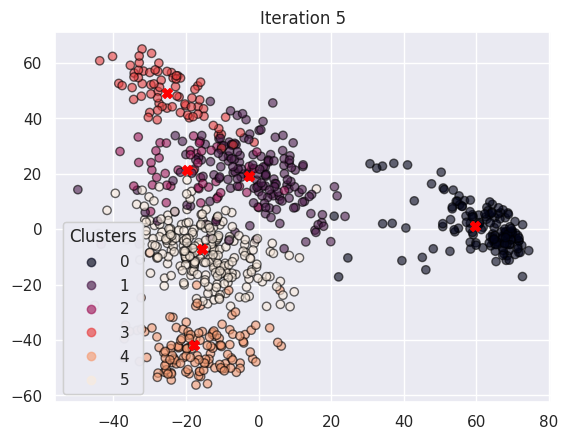

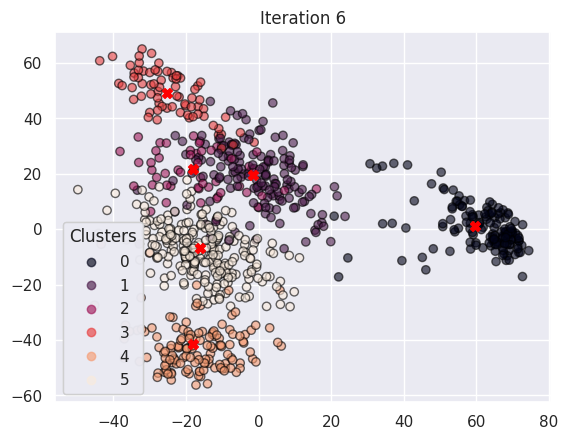

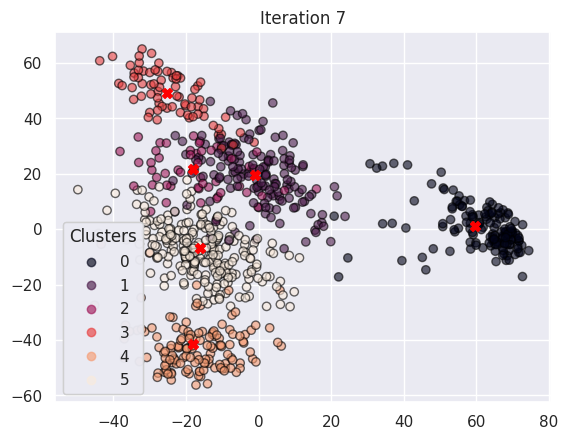

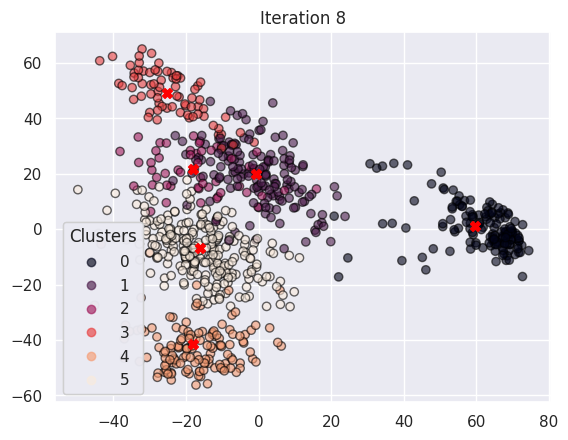

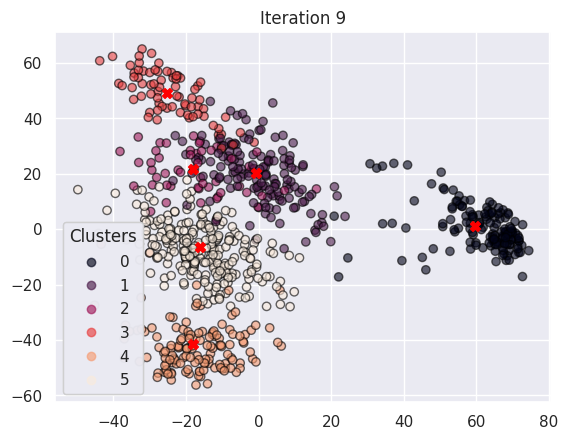

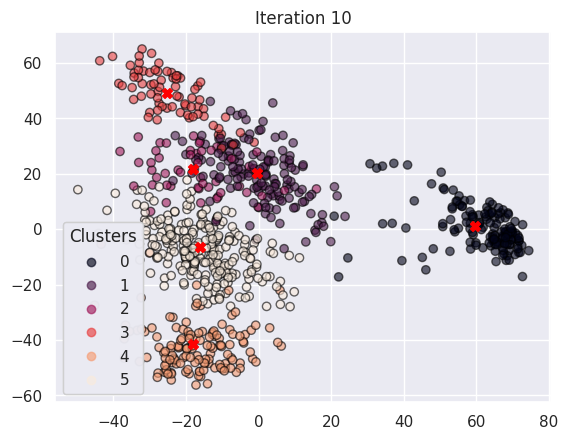

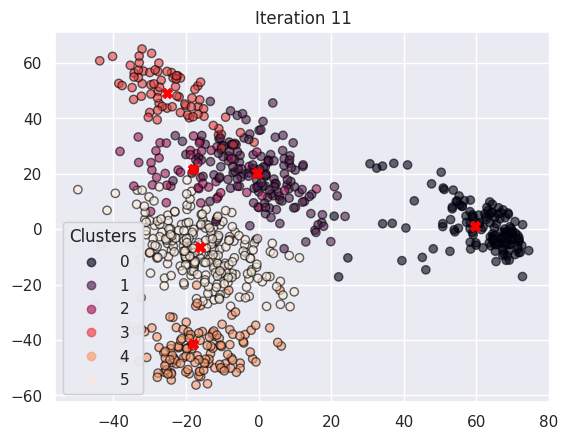

In [145]:
#k-means clustering
max_iterations = 100
k = 6  #using same from silhouette_scores

#first select centroids randomly
centroids = random_centroids(data_scaled, k)
old_centroids = pd.DataFrame()
iteration = 1

#stop when old centroids are equal to new centroids that means centroid is not shifting or iterations reached to maximum number mentioned
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    assignment = cluster_assignment(data_scaled, centroids)
    centroids = new_centroids(data_scaled, assignment , k)
    plot_clusters(data_scaled, assignment, centroids, iteration)
    iteration += 1

plt.show()

#since we are selecting cetroids randomly, number of iterations may vary each time we run the code.

In [149]:
predicted_labels = assignment.tolist()
Clusters_analyze(predicted_labels, true_labels)

,cluster,number of items,0,1,2,3,4
0,0,145,0.0,0.0,100.0,0.0,0.0
1,1,150,3.3,3.3,0.7,92.7,0.0
2,2,51,96.1,0.0,0.0,3.9,0.0
3,3,73,0.0,100.0,0.0,0.0,0.0
4,4,136,0.0,0.0,0.0,0.0,100.0
5,5,246,100.0,0.0,0.0,0.0,0.0


**Conclusion**
Clusters 0,3,4 and 5 are pure clusters because they are perfectly segregated to contain only one type of label each. Cluster 1 is almost a pure cluster, with a very high percentage of LUAD but there is a very small presence of other labels, which could be considered as noise or outliers. Cluster 2 is the only cluster that is not predominantly one label. It is primarily made up of BRCA being the majority.Since I took 6 clusters for 5 labels BRCA is divided amoung 2 clusters 2 and 5.


In [147]:
#Accuracy
ari_score = adjusted_rand_score(true_labels, predicted_labels)

print(f'Adjusted Rand Index: {ari_score}')
print("V Measure score:",v_measure_score(true_labels, predicted_labels))

Adjusted Rand Index: 0.8559951978194553
V Measure score: 0.9017668152880333


Comparing the accuracy:

Adjusted Rand Index that computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings increased from 0.82 when used KMeans to 0.85 when done manually.

V-measure which is the harmonic mean between homogeneity and completeness increased from 0.89 (when KMeans used) to 0.90 (when done manually)